# Insurance prediction using PyCaret

Pycaret is one of the library, where with low code it can create an automated process to apply all the features such as feature engineering, feature selection, handling missing values, Normalization etc. It also allows to apply machine learning algorithms and compare between them. 

In [1]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Data Preprocessing
In this step with the command 'Setup' and specifying all the required parameters in it. You can perform data preprocessing steps. By using this you dont need to handle one feature at a time it will handle all at once.

In [6]:
from pycaret.regression import *
s = setup(data, target = 'charges',categorical_features =['sex','smoker','region'],normalize = True,
           polynomial_features = True, trigonometry_features = True, feature_interaction=True, 
           bin_numeric_features= ['age', 'bmi'])

 
Setup Succesfully Completed.


,Description,Value
0,session_id,2559
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1338, 7)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


### Comparing all Machine learning alogithms( Regression problem)
After using 'compare_models' it will compare with all machine learning models and will give you result in a sequence that which model yields the best accuracy. We can see from below out put that it has compared with 21 machine learning(regression) algorithms and we can see that gradient boosting outperformed all with around 82.5% accuracy.

In [7]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Gradient Boosting Regressor,2816,2.435e+07,4897,0.825,0.4465,0.3252,0.5032
1,Bayesian Ridge,3074,2.507e+07,4963,0.8209,0.4316,0.3242,0.0442
2,CatBoost Regressor,2841,2.483e+07,4953,0.8201,0.4606,0.3311,7.762
3,Ridge Regression,3080,2.519e+07,4974,0.8199,0.4327,0.3239,0.0133
4,Light Gradient Boosting Machine,2997,2.515e+07,4978,0.8195,0.5592,0.3619,0.5297
5,Orthogonal Matching Pursuit,3074,2.536e+07,4998,0.8193,0.4261,0.3232,0.0138
6,Lasso Regression,3085,2.529e+07,4983,0.8192,0.4327,0.3238,0.121
7,Linear Regression,3102,2.542e+07,4997,0.8182,0.4353,0.3179,0.031
8,Random Forest,2875,2.535e+07,5014,0.8155,0.4568,0.3288,0.8317
9,TheilSen Regressor,3028,2.598e+07,5050,0.8137,0.4394,0.3049,15.49


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=2559, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

### Cross-validation
Here with command "create_model" we applied k-fold cross validation with k=10(by default) to get a better accuracy rate and we can see that after performing 10 folds we received an accuracy of around 86.2%

In [4]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2322,1.686e+07,4106,0.8739,0.3941,0.3198
1,2341,1.715e+07,4142,0.8694,0.3614,0.3082
2,2480,2.665e+07,5163,0.8428,0.4682,0.2615
3,2191,1.889e+07,4346,0.8966,0.4839,0.2594
4,2595,2.12e+07,4604,0.8394,0.3661,0.2616
5,2951,2.559e+07,5058,0.8091,0.421,0.3383
6,2188,1.823e+07,4270,0.892,0.4751,0.2623
7,3018,2.676e+07,5173,0.8549,0.5376,0.3883
8,1938,1.124e+07,3352,0.9084,0.3979,0.3144
9,2396,1.9e+07,4359,0.8393,0.4478,0.3399


### Visualizing model
We can see that the predicted accuracy for train set is around 91% and for test set it is 84%

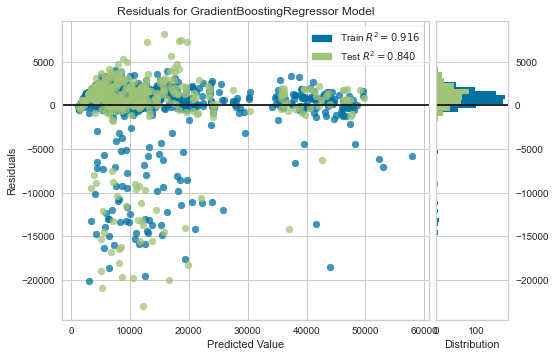

In [5]:
plot_model(gbr)

### Creating pickle file
Pickel file is created to store the model so that it can be used when calling in flask framework.

In [8]:
save_model(gbr, 'store.pickle')

Transformation Pipeline and Model Succesfully Saved
